# Tensorflow learning

## 1 Basics

https://www.tensorflow.org/guide/basics

### 1.1 Tensors

In [4]:
import tensorflow as tf

In [5]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [6]:
tf.nn.softmax(x, axis= -1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [7]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


### 1.2 Variables

`tf.Tensor` zijn onveanderlijk <-> `tf.Variable` zijn veranderlijk = nodig voor modelgewichten

In [8]:
var = tf.Variable([0.0, 0.0, 0.0])
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

### 1.3 Automatic differentiation

Use calculus to compute the gradients!

In [9]:
x = tf.Variable(1.0) #variable since mutable

def f(x):
  y = x**2 + 2*x - 5
  return y

In [10]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [11]:
with tf.GradientTape() as tape: #only works on variables
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

Also works for non scalars

### 1.4 Graphs and tf.function

In [12]:
#seperate the pure tensorflow code!
class test(tf.Module):
  @tf.function #compiles to tf graph
  def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [13]:
x = tf.constant([1, 2, 3])
test_obj = test()
# test_obj.my_func(x)

You can export for system not having python!

In [14]:
tf.saved_model.save(test_obj, 'data/')

INFO:tensorflow:Assets written to: data/assets


INFO:tensorflow:Assets written to: data/assets


### 1.5 Modules, layers and models

`tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them

In [15]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [16]:
mod = MyModule(3)
mod.weight.numpy()

3

In [17]:
mod.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [18]:
save_path = './data'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./data\assets


INFO:tensorflow:Assets written to: ./data\assets


In [19]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [20]:
reloaded.weight

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

### 1.6 Training loops

In [21]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [22]:
x = tf.linspace(-2, 2, 201)
x

<tf.Tensor: shape=(201,), dtype=float64, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [23]:
x = tf.cast(x, tf.float32) #from float64 to float32
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

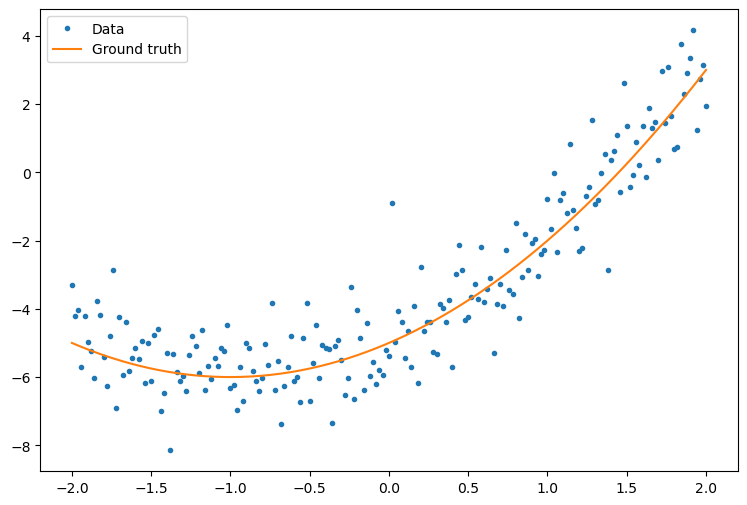

In [24]:
def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
#so .numpy() is method to convert to numpy!
plt.plot(x, f(x), label='Ground truth')
plt.legend()

In [25]:
x.numpy()

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,
        0.52,  0.54,

In [26]:
class Model(tf.Module):

  def __init__(self): #initialise the model! 
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    #Needs to be variables since needs to have possibility to update 
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
    print('I am initalised')

  @tf.function #always need this decorator!
  def __call__(self, x): #this allows calss to act like function
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    print('I am being called as a function')
    return self.w_q * (x**2) + self.w_l * x + self.b
  

In [27]:
model_instance = Model()

I am initalised


In [28]:
y_mod = model_instance(x)
# y is a tensor

I am being called as a function


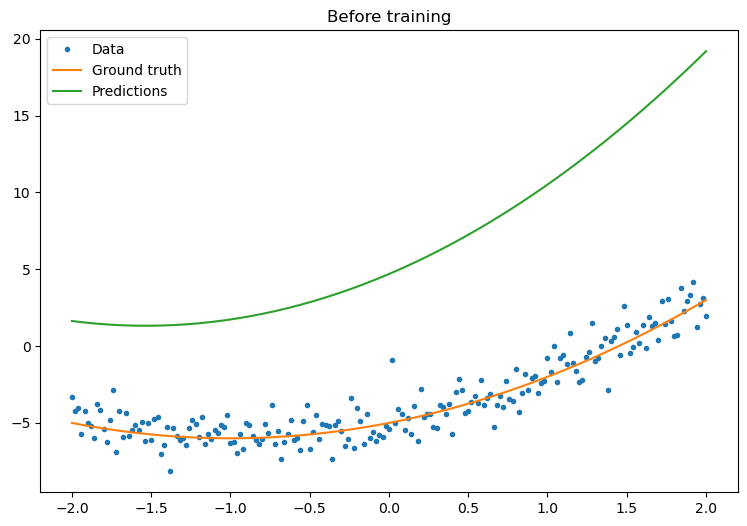

In [29]:
plt.figure()
plt.plot(x, y, '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model_instance(x), label='Predictions')
plt.title('Before training')
plt.legend()

In [30]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [31]:
batch_size = 32 #standard batch size!
dataset = tf.data.Dataset.from_tensor_slices((x,y))
list(dataset.as_numpy_iterator()) #so all pairs of features and outputs

[(-2.0, -3.2943912),
 (-1.98, -4.2058043),
 (-1.96, -4.0297666),
 (-1.94, -5.7184486),
 (-1.92, -4.212438),
 (-1.9, -4.980091),
 (-1.88, -5.2243314),
 (-1.86, -6.012889),
 (-1.84, -3.7758055),
 (-1.82, -4.181939),
 (-1.8, -5.4005523),
 (-1.78, -6.254741),
 (-1.76, -4.8046575),
 (-1.74, -2.8615432),
 (-1.72, -6.8987713),
 (-1.7, -4.245316),
 (-1.68, -5.9419346),
 (-1.66, -4.3764334),
 (-1.64, -5.8178964),
 (-1.62, -5.4385977),
 (-1.6, -5.1483603),
 (-1.58, -5.4578986),
 (-1.56, -4.9323015),
 (-1.54, -6.162622),
 (-1.52, -4.9950104),
 (-1.5, -6.109399),
 (-1.48, -4.764264),
 (-1.46, -4.605366),
 (-1.44, -7.007213),
 (-1.42, -6.468287),
 (-1.4, -5.2954564),
 (-1.38, -8.14543),
 (-1.36, -5.321705),
 (-1.34, -5.8609896),
 (-1.32, -6.118912),
 (-1.3, -5.967331),
 (-1.28, -6.421193),
 (-1.26, -5.3543725),
 (-1.24, -4.791391),
 (-1.22, -5.0966887),
 (-1.2, -5.8843184),
 (-1.18, -4.624037),
 (-1.16, -6.3929243),
 (-1.14, -5.688319),
 (-1.12, -6.0545664),
 (-1.1, -5.428941),
 (-1.08, -5.6871586)

"For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required." Here equal to is uzsed

In [32]:
list(dataset.shuffle(buffer_size = x.shape[0]).as_numpy_iterator())

[(1.12, -1.1823047),
 (1.56, 0.8840945),
 (-1.08, -5.6871586),
 (0.64, -3.0938375),
 (1.92, 4.161742),
 (-0.66, -6.251192),
 (0.26, -4.3918824),
 (1.22, -2.2256553),
 (-1.0, -6.3305297),
 (0.74, -2.2662508),
 (0.5, -4.247708),
 (-0.84, -6.129952),
 (0.14, -5.6981573),
 (0.54, -3.2697783),
 (-1.12, -6.0545664),
 (-1.02, -4.483122),
 (-0.42, -5.072431),
 (1.98, 3.138336),
 (1.68, 1.477865),
 (-1.46, -4.605366),
 (0.28, -5.2687445),
 (0.1, -5.448986),
 (-1.66, -4.3764334),
 (-0.98, -6.2247615),
 (-1.68, -5.9419346),
 (0.8, -1.4740906),
 (0.62, -3.4054742),
 (-1.98, -4.2058043),
 (1.5, 1.3581878),
 (1.2, -2.309051),
 (1.82, 0.74085236),
 (-0.72, -6.377953),
 (-0.5, -6.7089076),
 (1.18, -1.6328671),
 (-1.56, -4.9323015),
 (1.14, 0.8221717),
 (0.92, -1.9425266),
 (0.2, -2.7882404),
 (1.26, -0.41720605),
 (0.04, -4.9786673),
 (1.52, -0.43667907),
 (-0.22, -6.6470804),
 (1.46, -0.5764846),
 (-1.4, -5.2954564),
 (0.22, -4.644524),
 (-1.8, -5.4005523),
 (0.94, -3.0473468),
 (-0.52, -3.8438082),


So clearly this just shuffeled the above dataset!

In [33]:
dataset = dataset.shuffle(buffer_size = x.shape[0]).batch(batch_size)
batch_list = list(dataset.as_numpy_iterator())

In [34]:
batch_list[0]

(array([-1.94,  1.98, -0.02, -1.58,  1.06,  1.62,  0.04,  0.92, -0.22,
        -1.54,  0.96,  2.  ,  1.28,  0.34,  0.16,  1.18, -0.2 ,  1.72,
        -1.24, -1.3 , -1.5 ,  1.46,  1.78, -1.74,  0.28,  0.48, -0.5 ,
        -0.08,  0.1 , -1.68,  1.32, -0.16], dtype=float32),
 array([-5.7184486 ,  3.138336  , -5.196061  , -5.4578986 , -2.3371825 ,
        -0.13340163, -4.9786673 , -1.9425266 , -6.6470804 , -6.162622  ,
        -2.4064782 ,  1.9366003 ,  1.528836  , -3.9622085 , -3.9233313 ,
        -1.6328671 , -4.045196  ,  2.9601965 , -4.791391  , -5.967331  ,
        -6.109399  , -0.5764846 ,  1.6619916 , -2.8615432 , -5.2687445 ,
        -4.3341956 , -6.7089076 , -6.2011843 , -5.448986  , -5.9419346 ,
        -0.8033577 , -6.3764114 ], dtype=float32))

Example trainig

In [35]:
model_instance.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.6892653>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.3870163>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.4291573>)

I am being called as a function
I am being called as a function
Mean squared error for step 0: 55.295
Mean squared error for step 10: 9.744
Mean squared error for step 20: 3.985
Mean squared error for step 30: 1.978
Mean squared error for step 40: 1.289
Mean squared error for step 50: 1.058
Mean squared error for step 60: 0.970
Mean squared error for step 70: 0.943
Mean squared error for step 80: 0.934
Mean squared error for step 90: 0.931
Mean squared error for step 100: 0.932
Mean squared error for step 110: 0.932
Mean squared error for step 120: 0.929
Mean squared error for step 130: 0.931
Mean squared error for step 140: 0.930
Mean squared error for step 150: 0.929
Mean squared error for step 160: 0.930
Mean squared error for step 170: 0.930
Mean squared error for step 180: 0.930
Mean squared error for step 190: 0.929




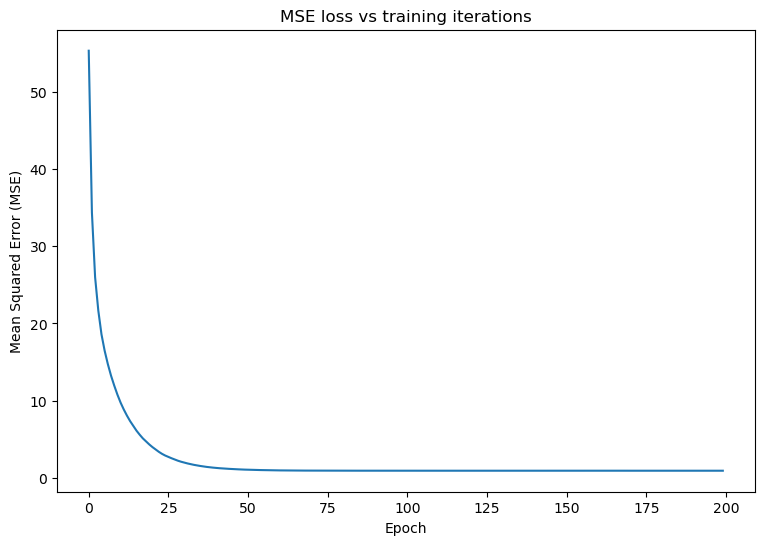

In [36]:
epochs = 200
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(model_instance(x_batch), y_batch) #so cacluate loss
        grads = tape.gradient(batch_loss, model_instance.variables)
        for g,v in zip(grads, model_instance.variables):
            v.assign_sub(learning_rate*g)
    loss = mse_loss(model_instance(x),y) #loss per epoch!
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');


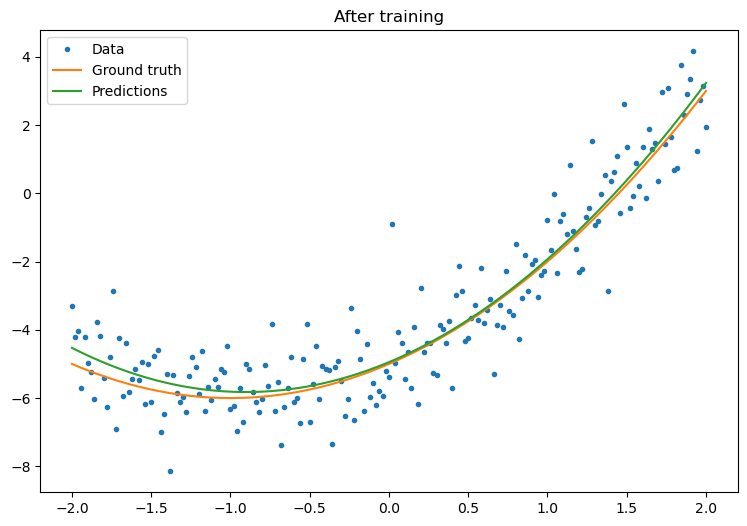

In [37]:
plt.figure()
plt.plot(x, y, '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model_instance(x), label='Predictions')
plt.title('After training')
plt.legend()

A lot of these things are availbale with Keras API!

- start with `tf.keras.Sequential` for sequential group of layers! https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 
- `tf.keras.layers.Dense` is the standard linear regression layer: $Y = WX + \mathbf{b}$. Note that you CAN use an activatio function here by specifying e..g 'acitvation = relu' https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense 

Here we want both $x$ and $x^2$ as input!


In [38]:
test_fun = lambda x: tf.stack([x, x**2], axis=1)
test_fun(tf.constant([3,4,5]))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  9],
       [ 4, 16],
       [ 5, 25]])>

In [39]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)), #Wraps arbitrary expressions as a Layer object.! 
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)]) #units1

In [40]:
new_model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), #SGD = Stochastic Gradient Descent
    loss = tf.keras.losses.MSE
)

history = new_model.fit(x, y,
                         epochs = 100,
                         batch_size = 32,
                         )

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 35.7189
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 21.9569
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 15.9710
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 12.1964
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 9.8437
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 8.1215
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 6.7839
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 5.8129
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 5.0460
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 4.4212
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 3.9504
Epoch 12/100
7/7 [==============================] - 0s 1ms/step - loss: 3.5617
Epoch 13/100
7/7 [==============================] - 0s 1m

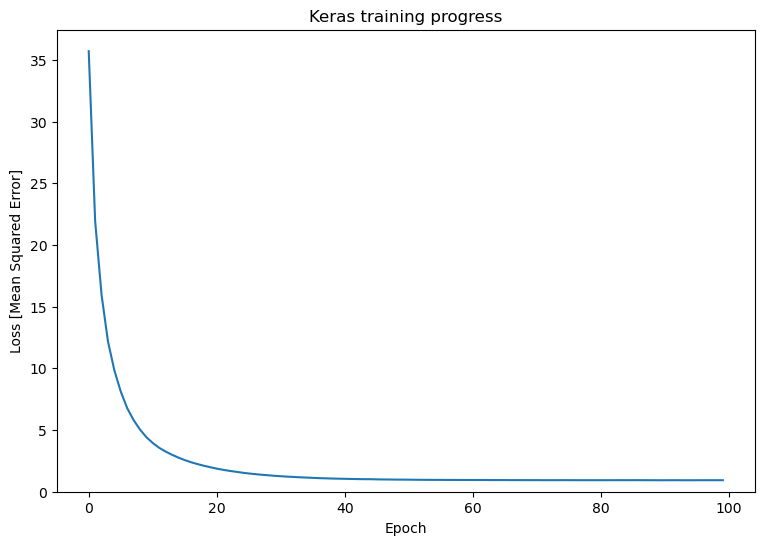

In [41]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

## 2 Tensors

https://www.tensorflow.org/guide/tensor

tensors may have 0 (scalr) or 1 (vector),2, 3... (matrix) axes

`np.array` for tensor to numpy array

`.shape` voor vomr

## 3 Variables

https://www.tensorflow.org/guide/variable


## 4 Automatic differentiation

https://www.tensorflow.org/guide/autodiff

Needed for backpropagation:

Network: ${\displaystyle g(x):=f^{L}(W^{L}f^{L-1}(W^{L-1}\cdots f^{1}(W^{1}x)\cdots ))}$

Cost: ${\displaystyle C(y_{i},g(x_{i}))}$

"Backpropagation efficiently computes the gradient by avoiding duplicate calculations and not computing unnecessary intermediate values, by computing the gradient of each layer – specifically, the gradient of the weighted input of each layer, denoted by  ${\displaystyle \delta ^{l}}$ – from back to front."

*TensorFlow "records" relevant operations executed inside the context of a `tf.GradientTape` onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.*

In [42]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)  #(taget, source)
dy_dx.numpy() #dy/dx == 2*x = 3

6.0

In [43]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)
grad

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1.5221385, 2.1315384],
        [3.044277 , 4.263077 ],
        [4.5664153, 6.394615 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.5221385, 2.1315384], dtype=float32)>]

In [44]:
for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense_1/kernel:0, shape: (3, 2)
dense_1/bias:0, shape: (2,)


So both for bias and the $w$ values a gradient!

# Keras

## 1 The Sequential model

https://www.tensorflow.org/guide/keras/sequential_model



In [50]:
from tensorflow import keras
from keras import layers


goed voor 'plain stack', dus één input en één output tensor per laag!

In [52]:
model = keras.Sequential(
    [
    layers.Dense(2, activation = "relu", name = 'layer1'), #first number = dimensionality of the output space!
    layers.Dense(3, activation = "relu", name = 'layer2'),
    layers.Dense(4, name = 'layer3'),
    ]
)

x = tf.ones((3,3))
print(x)
y = model(x)
print(y)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 0.04979995  0.02765248 -0.02600447 -0.03051421]
 [ 0.04979995  0.02765248 -0.02600447 -0.03051421]
 [ 0.04979995  0.02765248 -0.02600447 -0.03051421]], shape=(3, 4), dtype=float32)


you can equivalent also stack the layers (one in the other)

In [53]:
model.layers

alternative below!

In [58]:
model_alt = keras.Sequential()
model_alt.add(layers.Dense(2, activation = 'relu'))
model_alt.add(layers.Dense(3, activation = 'relu'))
model_alt.add(layers.Dense(4))

`model.pop()` to remove a layer

In [59]:
model_alt.weights

ValueError: Weights for model sequential_12 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

Before you give an input, no weights are given as these depend on the input size of your vector!

In [63]:
x.shape

TensorShape([3, 3])

In [61]:
y = model_alt(x)
#now the model has been build
model_alt.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (3, 2)                    8         
                                                                 
 dense_15 (Dense)            (3, 3)                    9         
                                                                 
 dense_16 (Dense)            (3, 4)                    16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


You can define the shape of your input in advance!

In [65]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [67]:
#equivalent
model = keras.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape = (4,)))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**In general, it's a recommended best practice to always specify the input shape of a Sequential model in advance if you know what it is.**

## 2 RNN in Keras

https://www.tensorflow.org/guide/keras/rnn

In [68]:
import numpy as np

In [72]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim = 1000, output_dim = 64))
#1000 characters input vocab to output embedding

model.add(layers.LSTM(128)) #128 internal units

model.add(layers.Dense(10))

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_test = keras.Sequential()
model_test.add(layers.LSTM(5, input_shape = (100,11,)))
model_test.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5)                 340       
                                                                 
Total params: 340
Trainable params: 340
Non-trainable params: 0
_________________________________________________________________


Default: only return last value of the OUTPUT so that output is of size `(batch_size, units)`
If you want value for every timestep set `return_sequences = True` and then you get output of size `(batch_size, timesteps, units)`

In [79]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


If you also want to retrieve the (FINAl) internal states, you should specify this!

In [81]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, None, 64)     64000       ['input_4[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, None, 64)     128000      ['input_5[0][0]']                
                                                                                              

RNN cell = 1 timpestap at a time processes <=> RNN default all at the same time!

`RNN(LSTMCel(10))` is a RNN 'for loop' around the `LSTMCel` structure!! 

Maybe useful: https://www.tensorflow.org/guide/keras/rnn#cross-batch_statefulness however not sure that this is the goal...

# Basic regression with Keras

https://www.tensorflow.org/tutorials/keras/regression

# Frederik Kratzert LSTM for rainfall runoff modellin

